In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
!ls data

AmenitiesGrafoTransporte.csv	GrafoCuscoTransporte_nodes.csv
EdgesCusco_wazeinfo.csv		RutasCusco.csv
GrafoCusco_edges.csv		RutasCusco_snap_CuscoNodes.csv
GrafoCusco_edgeswaze0800.csv	wazeresults_bank.csv
GrafoCusco_edgeswaze1400.csv	wazeresults_courthouse.csv
GrafoCusco_edgeswaze.csv	wazeresults_hospital.csv
GrafoCusco_edgeswaze.zip	wazeresults_police.csv
GrafoCusco_nodes.csv		wazeresults_school.csv
GrafoCusco_nodes.zip		wazeresults_university.csv
GrafoCuscoTransporte_edges.csv


In [27]:
amenities = ['school', 'university', 'bank', 'courthouse', 'hospital', 'police']
def readamenity(amenity):
    df = pd.read_csv(f"data/wazeresults_{amenity}.csv", sep=';',)
    df['amenity'] = amenity
    return df
    
amenities_data = [readamenity(var) for var in amenities]

In [29]:
amenities_data[0]

,source,target,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,amenity
0,4427153413,993167872,NaN,NaN,NaN,NaN,school
1,4427153413,2735769089,NaN,NaN,NaN,NaN,school
2,4427153413,3739432963,NaN,NaN,NaN,NaN,school
3,4427153413,30983685,NaN,NaN,NaN,NaN,school
4,4427153413,4590287365,NaN,NaN,NaN,NaN,school
...,...,...,...,...,...,...,...
543485,30965748,30983670,1.281,5.00,1.281,5.333333,school
543486,30965748,30983671,1.283,5.00,1.283,5.333333,school
543487,30965748,30964728,NaN,NaN,NaN,NaN,school
543488,30965748,4428261882,3.736,11.80,3.736,12.200000,school


In [30]:
data = pd.concat(amenities_data, ignore_index=True)
data

,source,target,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,amenity
0,4427153413,993167872,NaN,NaN,NaN,NaN,school
1,4427153413,2735769089,NaN,NaN,NaN,NaN,school
2,4427153413,3739432963,NaN,NaN,NaN,NaN,school
3,4427153413,30983685,NaN,NaN,NaN,NaN,school
4,4427153413,4590287365,NaN,NaN,NaN,NaN,school
...,...,...,...,...,...,...,...
744340,30965748,30985588,1.256,4.400000,1.256,4.550000,police
744341,30965748,30970486,10.594,22.200000,10.560,22.033333,police
744342,30965748,1014221558,1.867,4.966667,1.867,5.200000,police
744343,30965748,4326256441,1.390,4.333333,1.390,4.533333,police


In [149]:
data.max()

source                  11045533749
target                  10938632423
wazeinfo0800_km              41.382
wazeinfo1400_minutes        68.0833
wazeinfo1400_km              41.378
wazeinfo0800_minutes          65.65
amenity                  university
dtype: object

In [150]:
data.fillna(99, inplace=True)

In [74]:
# data.columns
wazecols = ['wazeinfo0800_km', 'wazeinfo1400_minutes','wazeinfo1400_km', 'wazeinfo0800_minutes']
data.query("amenity=='courthouse'").dropna(subset=wazecols, axis=0)

Index(['source', 'target', 'wazeinfo0800_km', 'wazeinfo1400_minutes',
       'wazeinfo1400_km', 'wazeinfo0800_minutes', 'amenity'],
      dtype='object')

In [157]:
datamin_list = []
for column in ['wazeinfo0800_km', 'wazeinfo1400_minutes','wazeinfo1400_km', 'wazeinfo0800_minutes']:
    
#     column = 'wazeinfo0800_km'
    grouped = data.groupby(['source', 'amenity'])
    min_indices = grouped[column].idxmin()
#     min_rows = data.loc[min_indices.dropna()]
    min_rows = data.loc[min_indices]

    columns = ['source', 'amenity', column ]
    datamin_list.append(min_rows[columns].set_index('source'))

In [87]:
# data_min[0].set_index('source')

In [158]:
datamin = pd.concat(datamin_list, axis=1)
datamin = datamin.loc[:,~datamin.columns.duplicated()]
datamin

,amenity,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes
source,,,,,
30962246,bank,0.021,0.033333,0.021,0.033333
30962246,courthouse,2.509,6.550000,2.509,6.166667
30962246,hospital,2.324,6.066667,2.315,5.683333
30962246,police,1.248,2.883333,1.252,3.033333
30962246,school,0.056,0.183333,0.056,0.150000
...,...,...,...,...,...
11045533749,courthouse,8.709,17.600000,8.715,15.450000
11045533749,hospital,8.825,18.433333,8.831,16.433333
11045533749,police,0.092,0.133333,0.092,0.166667


In [107]:
# datamin.to_csv("data/CuscoMinValues2Amenities.csv", sep=';')

In [163]:
datamin['amenity'].unique()

array(['bank', 'courthouse', 'hospital', 'police', 'school', 'university'],
      dtype=object)

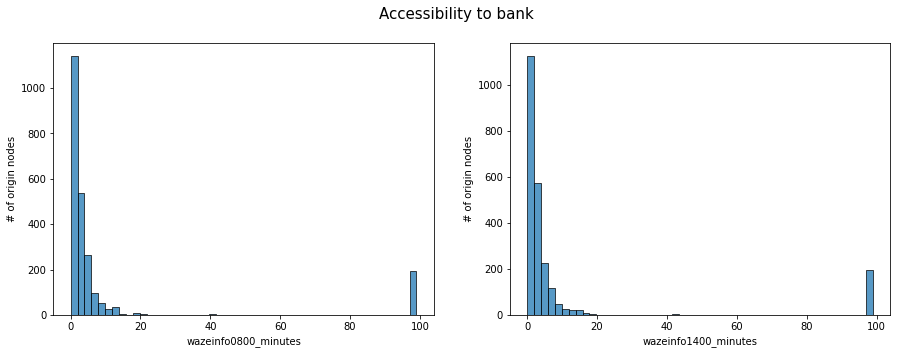

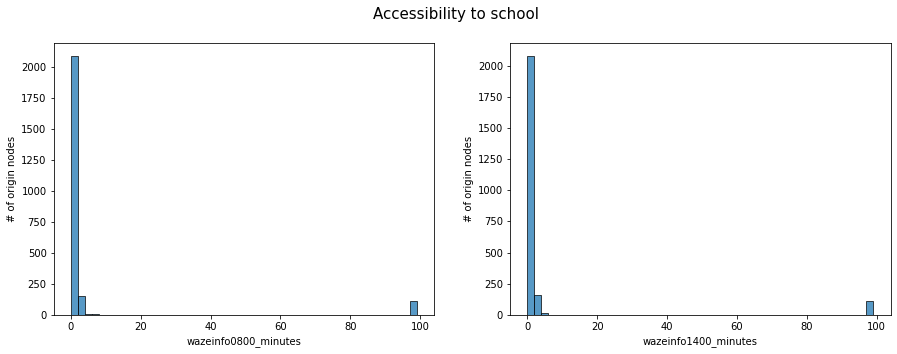

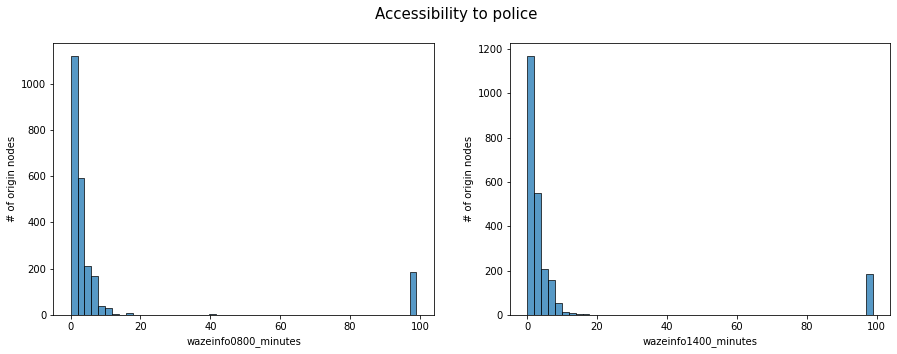

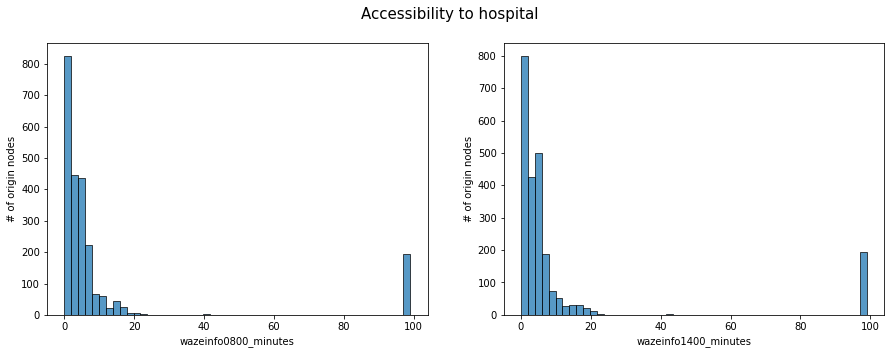

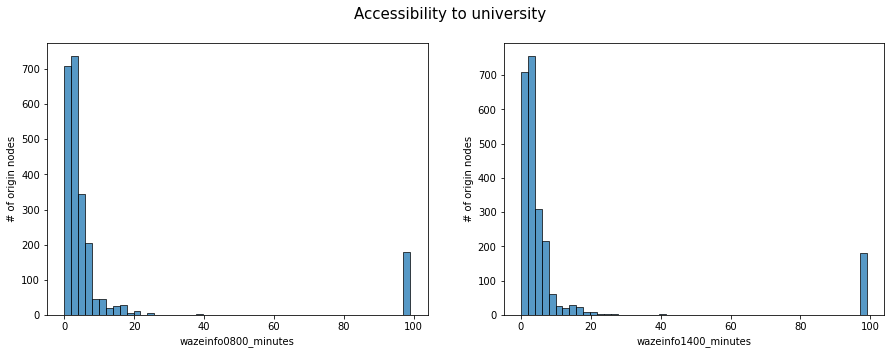

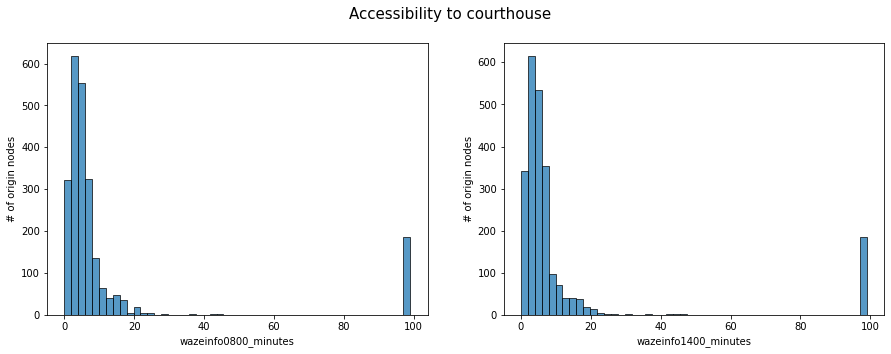

In [167]:
for amenity in ['bank', 'school', 'police', 'hospital', 'university', 'courthouse']:

    fig, axes = plt.subplots(1,2, figsize=(15,5))
#     amenity = 'university'
    df = datamin.query("amenity == @amenity")

    sns.histplot(data=df, x='wazeinfo0800_minutes', ax=axes[0], bins=50)
    sns.histplot(data=df, x='wazeinfo1400_minutes', ax=axes[1], bins=50)

    axes[0].set_ylabel("# of origin nodes")
    axes[1].set_ylabel("# of origin nodes")
    # axes[1].set_title()

    fig.suptitle(f'Accessibility to {amenity} ', fontsize=15)
    plt.show()
    fig.savefig(f"img/accessibility_minutes_{amenity}.png")

In [162]:
data.query("amenity=='school' and source == 30962246").sort_values('wazeinfo0800_minutes')

,source,target,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,amenity
307802,30962246,2357195908,0.056,0.183333,0.056,0.150000,school
307774,30962246,30962251,0.096,0.266667,0.096,0.233333,school
307775,30962246,30962252,0.096,0.266667,0.096,0.233333,school
307866,30962246,30962459,0.326,0.816667,0.326,0.766667,school
307869,30962246,30962463,0.336,0.833333,0.336,0.783333,school
...,...,...,...,...,...,...,...
307770,30962246,30964801,99.000,99.000000,99.000,99.000000,school
307928,30962246,30964727,99.000,99.000000,99.000,99.000000,school
307929,30962246,1003614644,99.000,99.000000,99.000,99.000000,school
307914,30962246,993167755,99.000,99.000000,99.000,99.000000,school


In [156]:
wazecols = ['wazeinfo0800_km', 'wazeinfo1400_minutes','wazeinfo1400_km', 'wazeinfo0800_minutes']
data.query("amenity=='courthouse'") #.dropna(subset=wazecols, axis=0)

,source,target,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,amenity
661640,4427153413,441230275,99.000,99.000000,99.000,99.000000,courthouse
661641,4427153413,3738278157,99.000,99.000000,99.000,99.000000,courthouse
661642,4427153413,30985399,99.000,99.000000,99.000,99.000000,courthouse
661643,10232315911,441230275,2.200,6.200000,2.200,7.100000,courthouse
661644,10232315911,3738278157,1.613,3.783333,1.613,3.950000,courthouse
...,...,...,...,...,...,...,...
668724,588513256,3738278157,5.857,12.600000,5.856,12.966667,courthouse
668725,588513256,30985399,99.000,99.000000,99.000,99.000000,courthouse
668726,30965748,441230275,4.651,11.216667,4.651,11.200000,courthouse
668727,30965748,3738278157,1.178,5.100000,1.178,5.600000,courthouse


/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='wazeinfo0800_km', ylabel='Density'>

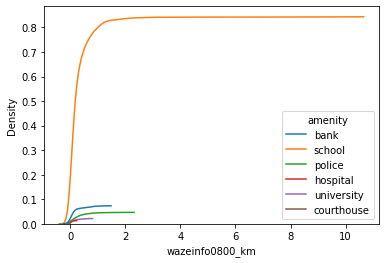

In [108]:
sns.kdeplot(data=datamin, x='wazeinfo0800_km', hue='amenity', cumulative=True)

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='wazeinfo1400_km', ylabel='Density'>

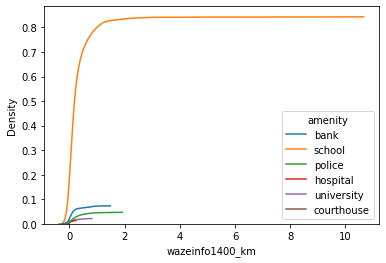

In [103]:
sns.kdeplot(data=datamin, x='wazeinfo1400_km',  cumulative=True, hue='amenity')

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='wazeinfo0800_minutes', ylabel='Density'>

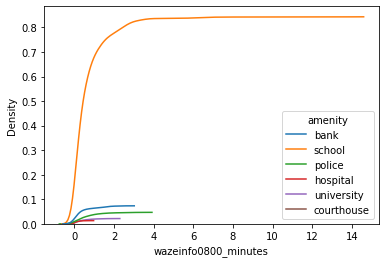

In [104]:
sns.kdeplot(data=datamin, x='wazeinfo0800_minutes',  cumulative=True, hue='amenity')

<AxesSubplot:xlabel='wazeinfo1400_minutes', ylabel='Density'>

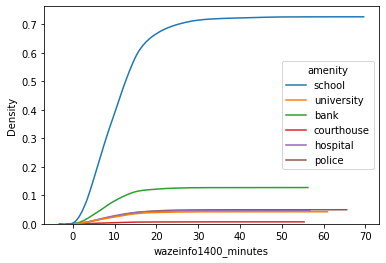

In [35]:
sns.kdeplot(data=data, x='wazeinfo1400_minutes',  cumulative=True, hue='amenity')

In [12]:
var_amenity = 'school'
data = pd.read_csv(f"data/wazeresults_{var_amenity}.csv", sep=';',)

In [13]:
data

,source,target,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes
0,4427153413,993167872,NaN,NaN,NaN,NaN
1,4427153413,2735769089,NaN,NaN,NaN,NaN
2,4427153413,3739432963,NaN,NaN,NaN,NaN
3,4427153413,30983685,NaN,NaN,NaN,NaN
4,4427153413,4590287365,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
543485,30965748,30983670,1.281,5.00,1.281,5.333333
543486,30965748,30983671,1.283,5.00,1.283,5.333333
543487,30965748,30964728,NaN,NaN,NaN,NaN
543488,30965748,4428261882,3.736,11.80,3.736,12.200000


In [14]:
data['source'].nunique()

2363

<AxesSubplot:xlabel='wazeinfo0800_km', ylabel='Count'>

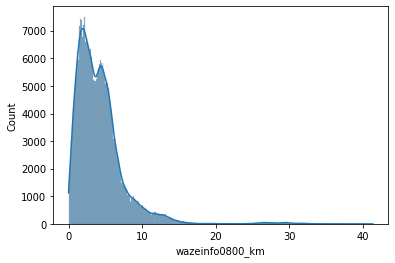

In [18]:
sns.histplot(data=data, x='wazeinfo0800_km', kde=True)

<AxesSubplot:xlabel='wazeinfo0800_km', ylabel='Density'>

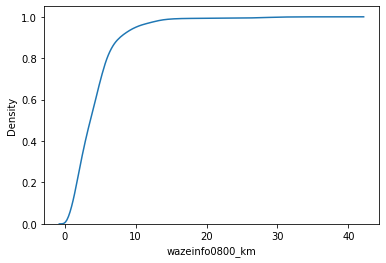

In [19]:
sns.kdeplot(data=data, x='wazeinfo0800_km',  cumulative=True,)